In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3)) 
formatter.format = '%1.1e'
plt.style.use('ggplot')

In [329]:
df_events = pd.read_csv('events1.csv')
display(df_events)
df_events['ga_session_id'].nunique()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29
...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08
758880,234237,12443,IN,desktop,add_to_cart,973,2021-01-31 23:59:08
758881,234237,12443,IN,desktop,add_to_cart,915,2021-01-31 23:59:08
758882,234237,12443,IN,desktop,add_to_cart,919,2021-01-31 23:59:08


18034

In [330]:
df_users = pd.read_csv('users.csv')
df_users = df_users.rename(columns={'id': 'user_id'})
display(df_users)

,user_id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38
...,...,...,...
270149,270149,0,2020-11-10 01:12:59
270150,270150,0,2020-11-04 08:16:05
270151,270151,0,2020-11-04 17:25:31
270152,270152,0,2020-11-04 20:20:03


In [331]:
df_items = pd.read_csv('items.csv')
df_items = df_items.rename(columns={'id': 'item_id'})
display(df_items)

,item_id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11
...,...,...,...,...,...,...
1376,1376,Google Tritan Bottle Gray,Google,NaN,Shop by Brand,12
1377,1377,White Google Cloud Tumbler,Google,NaN,Shop by Brand,27
1378,1378,Google Separating Keyring,Google,NaN,Accessories,6
1379,1379,Google Mountain View Campus Bottle,Google,NaN,Apparel,14


In [332]:
df_merged = pd.merge(df_events, df_users, on='user_id', how='left')
df = pd.merge(df_merged, df_items, on='item_id', how='left')
df.head()

,user_id,ga_session_id,country,device,type,item_id,date_x,ltv,date_y,name,brand,variant,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google KeepCup,Google,Single Option Only,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google Mini Kick Ball,Google,Single Option Only,Fun,2
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,0,2020-08-18 03:44:52,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25


In [333]:
df = df.drop(columns=['date_y', 'item_id', 'ga_session_id', 'variant'])
df = df.rename(columns={
    'date_x': 'date',
    'name': 'product_name',
    'price_in_usd': 'price'
})
display(df.head(),df.shape)

,user_id,country,device,type,date,ltv,product_name,brand,category,price
0,2133,US,mobile,purchase,2020-11-01 00:27:14,34,Google Large Tote White,Google,Bags,10
1,2133,US,mobile,purchase,2020-11-01 00:27:14,34,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,SE,desktop,purchase,2020-11-01 01:44:44,72,Google KeepCup,Google,New,28
3,5789,SE,desktop,purchase,2020-11-01 01:44:44,72,Google Mini Kick Ball,Google,Fun,2
4,5808,US,mobile,add_to_cart,2020-11-01 03:06:29,0,Google Infant Hero Onesie Grey,Google,Apparel,25


(758884, 10)

In [334]:
df.dtypes

user_id          int64
country         object
device          object
type            object
date            object
ltv              int64
product_name    object
brand           object
category        object
price            int64
dtype: object

In [335]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('W')
df.head()

,user_id,country,device,type,date,ltv,product_name,brand,category,price
0,2133,US,mobile,purchase,2020-10-26/2020-11-01,34,Google Large Tote White,Google,Bags,10
1,2133,US,mobile,purchase,2020-10-26/2020-11-01,34,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,SE,desktop,purchase,2020-10-26/2020-11-01,72,Google KeepCup,Google,New,28
3,5789,SE,desktop,purchase,2020-10-26/2020-11-01,72,Google Mini Kick Ball,Google,Fun,2
4,5808,US,mobile,add_to_cart,2020-10-26/2020-11-01,0,Google Infant Hero Onesie Grey,Google,Apparel,25


In [336]:
print(f'''
Valores Únicos
      A coluna country possui {df['country'].nunique()} valores únicos
      A coluna device possui {df['device'].nunique()} valores únicos, sendo eles {df['device'].unique()}
      A coluna type possui {df['type'].nunique()} valores únicos, sendo eles {df['type'].unique()}
      A coluna ltv possui {df['ltv'].nunique()} valores únicos
      A coluna product_name possui {df['product_name'].nunique()} valores únicos
      A coluna brand possui {df['brand'].nunique()} valores únicos, sendo eles {df['brand'].unique()}
      A coluna category possui {df['category'].nunique()} valores únicos
''')


Valores Únicos
      A coluna country possui 108 valores únicos
      A coluna device possui 3 valores únicos, sendo eles ['mobile' 'desktop' 'tablet']
      A coluna type possui 3 valores únicos, sendo eles ['purchase' 'add_to_cart' 'begin_checkout']
      A coluna ltv possui 423 valores únicos
      A coluna product_name possui 421 valores únicos
      A coluna brand possui 5 valores únicos, sendo eles ['Google' 'YouTube' 'Android' '#IamRemarkable' 'Google Cloud']
      A coluna category possui 21 valores únicos



In [337]:
df.dropna(subset=['country'], inplace=True)
df.describe(include='all')

,user_id,country,device,type,date,ltv,product_name,brand,category,price
count,754329.000000,754329,754329,754329,754329,754329.000000,754329,754329,754329,754329.000000
unique,NaN,108,3,3,14,NaN,421,5,21,NaN
top,NaN,US,desktop,add_to_cart,2020-12-07/2020-12-13,NaN,Google Navy Speckled Tee,Google,Apparel,NaN
freq,NaN,337513,438888,663305,141015,NaN,14659,573278,293292,NaN
mean,29492.342929,NaN,NaN,NaN,NaN,61.635915,NaN,NaN,NaN,24.778578
std,55031.364298,NaN,NaN,NaN,NaN,124.322388,NaN,NaN,NaN,20.913177
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,8401.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,11.000000
50%,17190.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,22.000000
75%,25813.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,30.000000


In [338]:
df.to_csv('df_united.csv')

In [339]:
df.head()

,user_id,country,device,type,date,ltv,product_name,brand,category,price
0,2133,US,mobile,purchase,2020-10-26/2020-11-01,34,Google Large Tote White,Google,Bags,10
1,2133,US,mobile,purchase,2020-10-26/2020-11-01,34,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,SE,desktop,purchase,2020-10-26/2020-11-01,72,Google KeepCup,Google,New,28
3,5789,SE,desktop,purchase,2020-10-26/2020-11-01,72,Google Mini Kick Ball,Google,Fun,2
4,5808,US,mobile,add_to_cart,2020-10-26/2020-11-01,0,Google Infant Hero Onesie Grey,Google,Apparel,25


In [340]:
df[['user_id', 'type']] \
    .query('type == "purchase"') \
    .groupby('user_id').count() \
    .sort_values('type', ascending=False) \
    .head(5).reset_index()

,user_id,type
0,15696,60
1,18602,48
2,1569,38
3,17570,36
4,20451,34


In [341]:
df[['user_id', 'ltv']][df['user_id'] == 15696].head(1)

,user_id,ltv
19784,15696,765


In [342]:
df[['country', 'type']] \
    .query('type == "purchase"') \
    .groupby('country').count() \
    .sort_values('type', ascending=False) \
    .head(5).reset_index()

,country,type
0,US,6849
1,IN,1462
2,CA,1361
3,GB,457
4,ES,384


#### Análise do LTV

##### Device x LTV

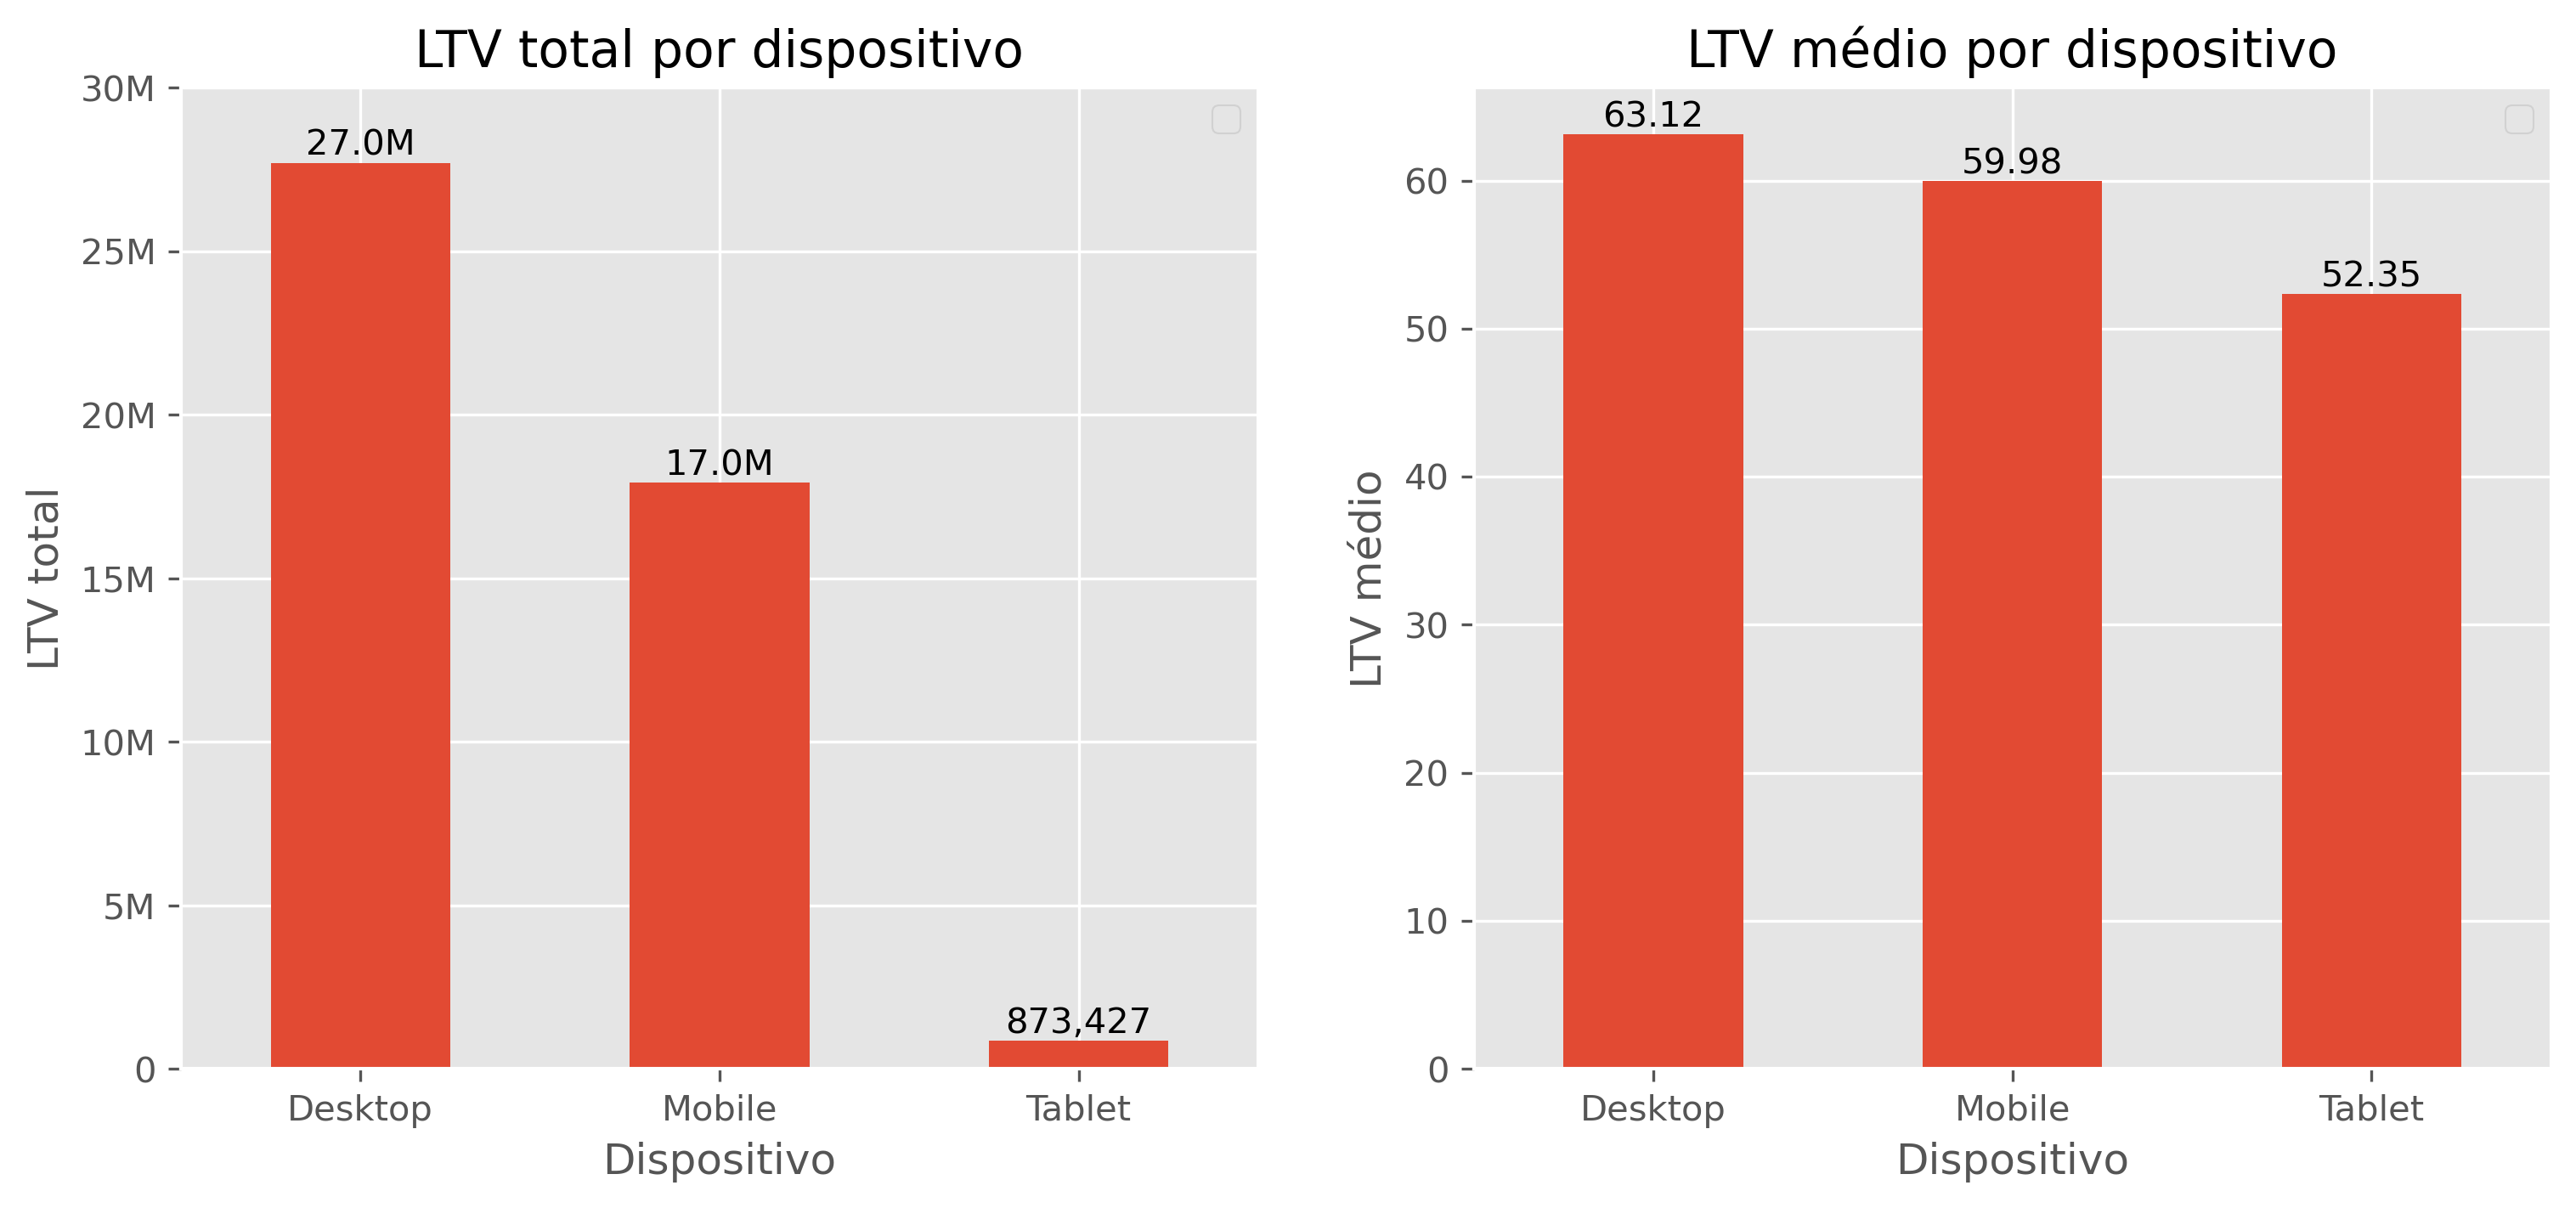

In [343]:
df_device_ltv = pd.DataFrame(columns=['device', 'sum_ltv', 'mean_ltv'])
df_device_ltv['device'] = df[['device', 'ltv']] \
                                .groupby('device').mean().reset_index()['device']
df_device_ltv['sum_ltv'] = df[['device', 'ltv']] \
                                .groupby('device').sum().reset_index()['ltv']
df_device_ltv['mean_ltv'] = df[['device', 'ltv']] \
                                .groupby('device').mean().reset_index()['ltv']
df_device_ltv['mean_ltv'] = df_device_ltv['mean_ltv'].round(2)

fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1, dpi=300)

# axs[0].bar(x=df_device_ltv['device'], height=df_device_ltv['sum_ltv'])
bars0 = df_device_ltv[['device', 'sum_ltv']].plot(kind='bar', x='device', ax=axs[0])
axs[0].set_title('LTV total por dispositivo')
axs[0].set_xlabel('Dispositivo')
axs[0].set_ylabel('LTV total')
axs[0].set_yticks(np.arange(0, 35000000, 5000000), ['0', '5M', '10M', '15M', '20M', '25M', '30M'])
axs[0].set_xticks([0, 1, 2], ['Desktop', 'Mobile', 'Tablet'], rotation=0)
axs[0].legend([])
for bar in bars0.containers:
    axs[0].bar_label(
        bar,
        labels=[f'{int(value/1e6):.1f}M' if value > 1e6 else f'{value:,.0f}' for value in bar.datavalues])

bars1 = df_device_ltv[['device', 'mean_ltv']].plot(kind='bar', x='device', ax=axs[1])
# axs[1].bar(x=df_device_ltv['device'], height=df_device_ltv['mean_ltv'])
axs[1].set_title('LTV médio por dispositivo')
axs[1].set_xlabel('Dispositivo')
axs[1].set_ylabel('LTV médio')
axs[1].legend([])
axs[1].set_xticks([0, 1, 2], ['Desktop', 'Mobile', 'Tablet'], rotation=0)
for bar in bars1.containers:
    axs[1].bar_label(bar)

plt.show()

##### Category x LTV

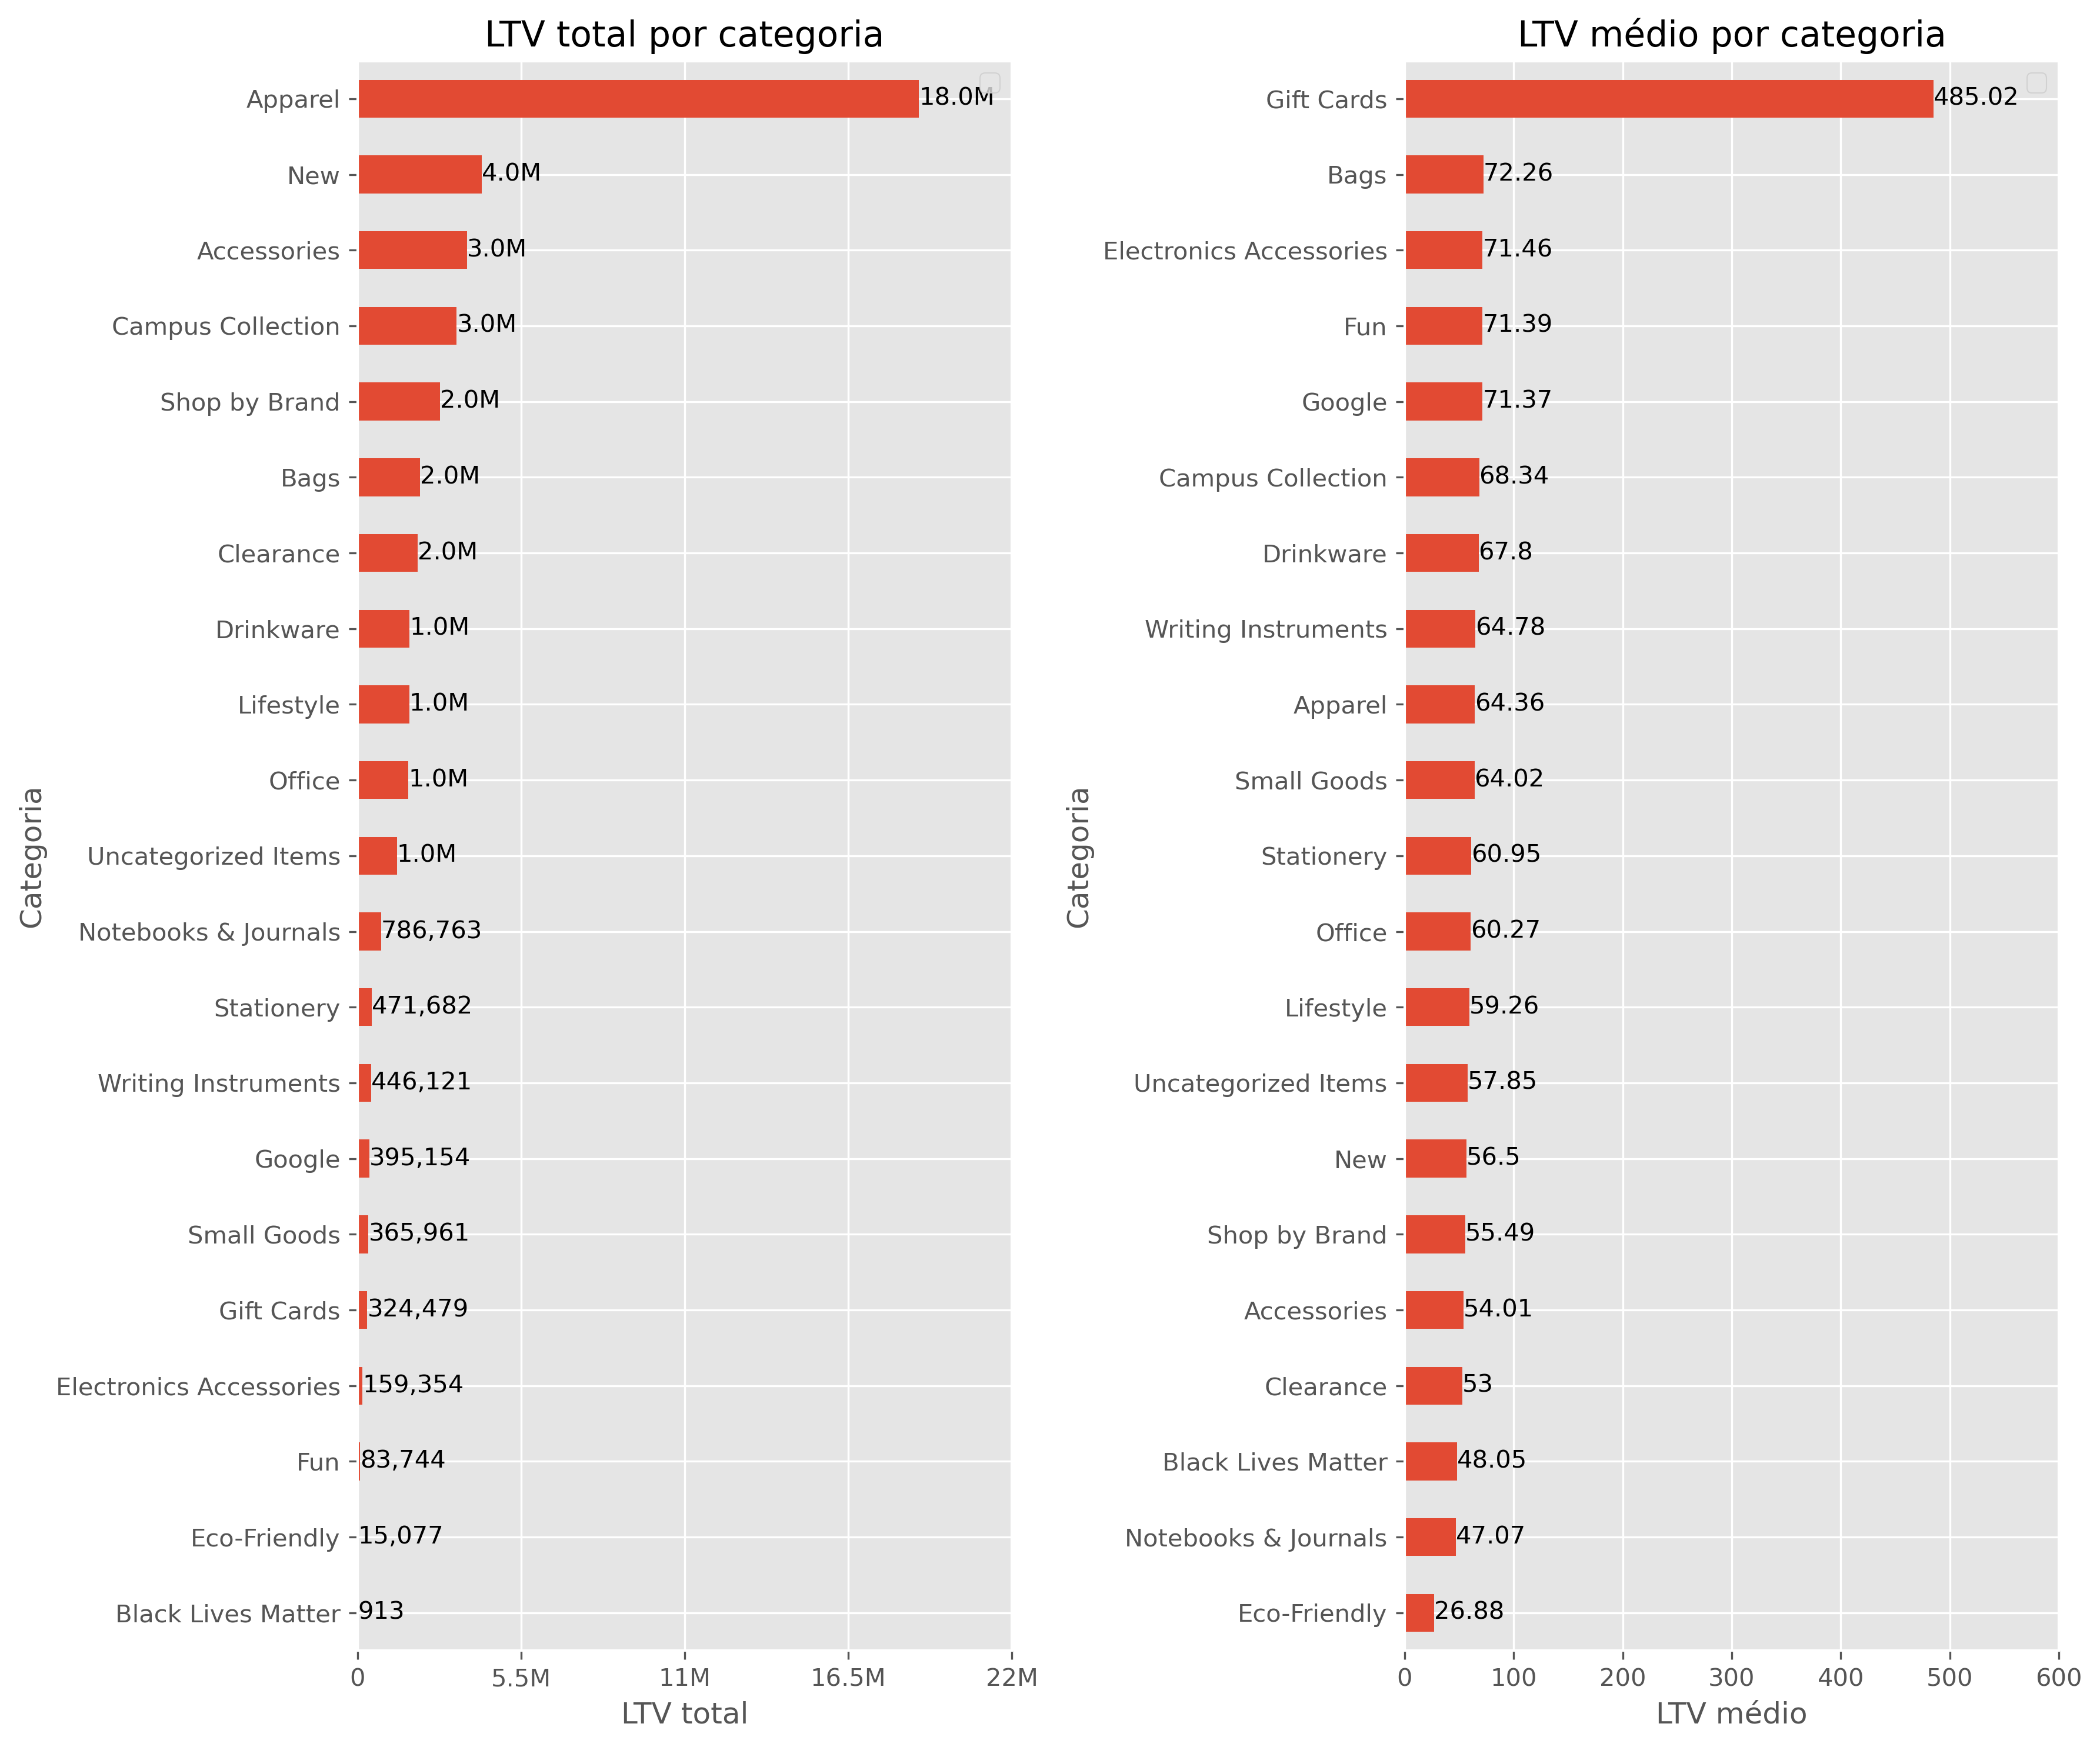

In [344]:
df_category_ltv = pd.DataFrame(columns=['category', 'sum_ltv', 'mean_ltv'])
df_category_ltv['category'] = df[['category', 'ltv']] \
                                .groupby('category').mean().reset_index()['category']
df_category_ltv['sum_ltv'] = df[['category', 'ltv']] \
                                .groupby('category').sum().reset_index()['ltv']
df_category_ltv['mean_ltv'] = df[['category', 'ltv']] \
                                .groupby('category').mean().reset_index()['ltv']
df_category_ltv['mean_ltv'] = df_category_ltv['mean_ltv'].round(2)

fig, axs = plt.subplots(figsize=(12,10), ncols=2, nrows=1, dpi=300)

df_category_ltv.sort_values('sum_ltv', inplace=True)
bars0 = df_category_ltv[['category', 'sum_ltv']].plot(kind='barh', x='category', ax=axs[0])
# axs[0].barh(y=df_category_ltv['category'], width=df_category_ltv['sum_ltv'], mouseover=True)
axs[0].set_title('LTV total por categoria')
axs[0].set_xlabel('LTV total')
axs[0].set_ylabel('Categoria')
axs[0].set_xticks(np.arange(0,26500000,5500000), ['0', '5.5M', '11M', '16.5M', '22M'])
for container in bars0.containers:
    axs[0].bar_label(
        container,
        labels=[f'{int(value/1e6):.1f}M' if value >= 1e6 else f'{value:,.0f}' for value in container.datavalues],
        label_type="edge",
    )
axs[0].legend([])

df_category_ltv.sort_values('mean_ltv', inplace=True)
bars1 = df_category_ltv[['category', 'mean_ltv']].plot(kind='barh', x='category', ax=axs[1])
# axs[1].barh(y=df_category_ltv['category'], width=df_category_ltv['mean_ltv'])
axs[1].set_title('LTV médio por categoria')
axs[1].set_xlabel('LTV médio')
axs[1].set_ylabel('Categoria')
axs[1].set_xticks(np.arange(0, 700, 100))
for bar in bars1.containers:
    axs[1].bar_label(bar)
axs[1].legend([])

plt.tight_layout()
plt.show()

##### Country x LTV

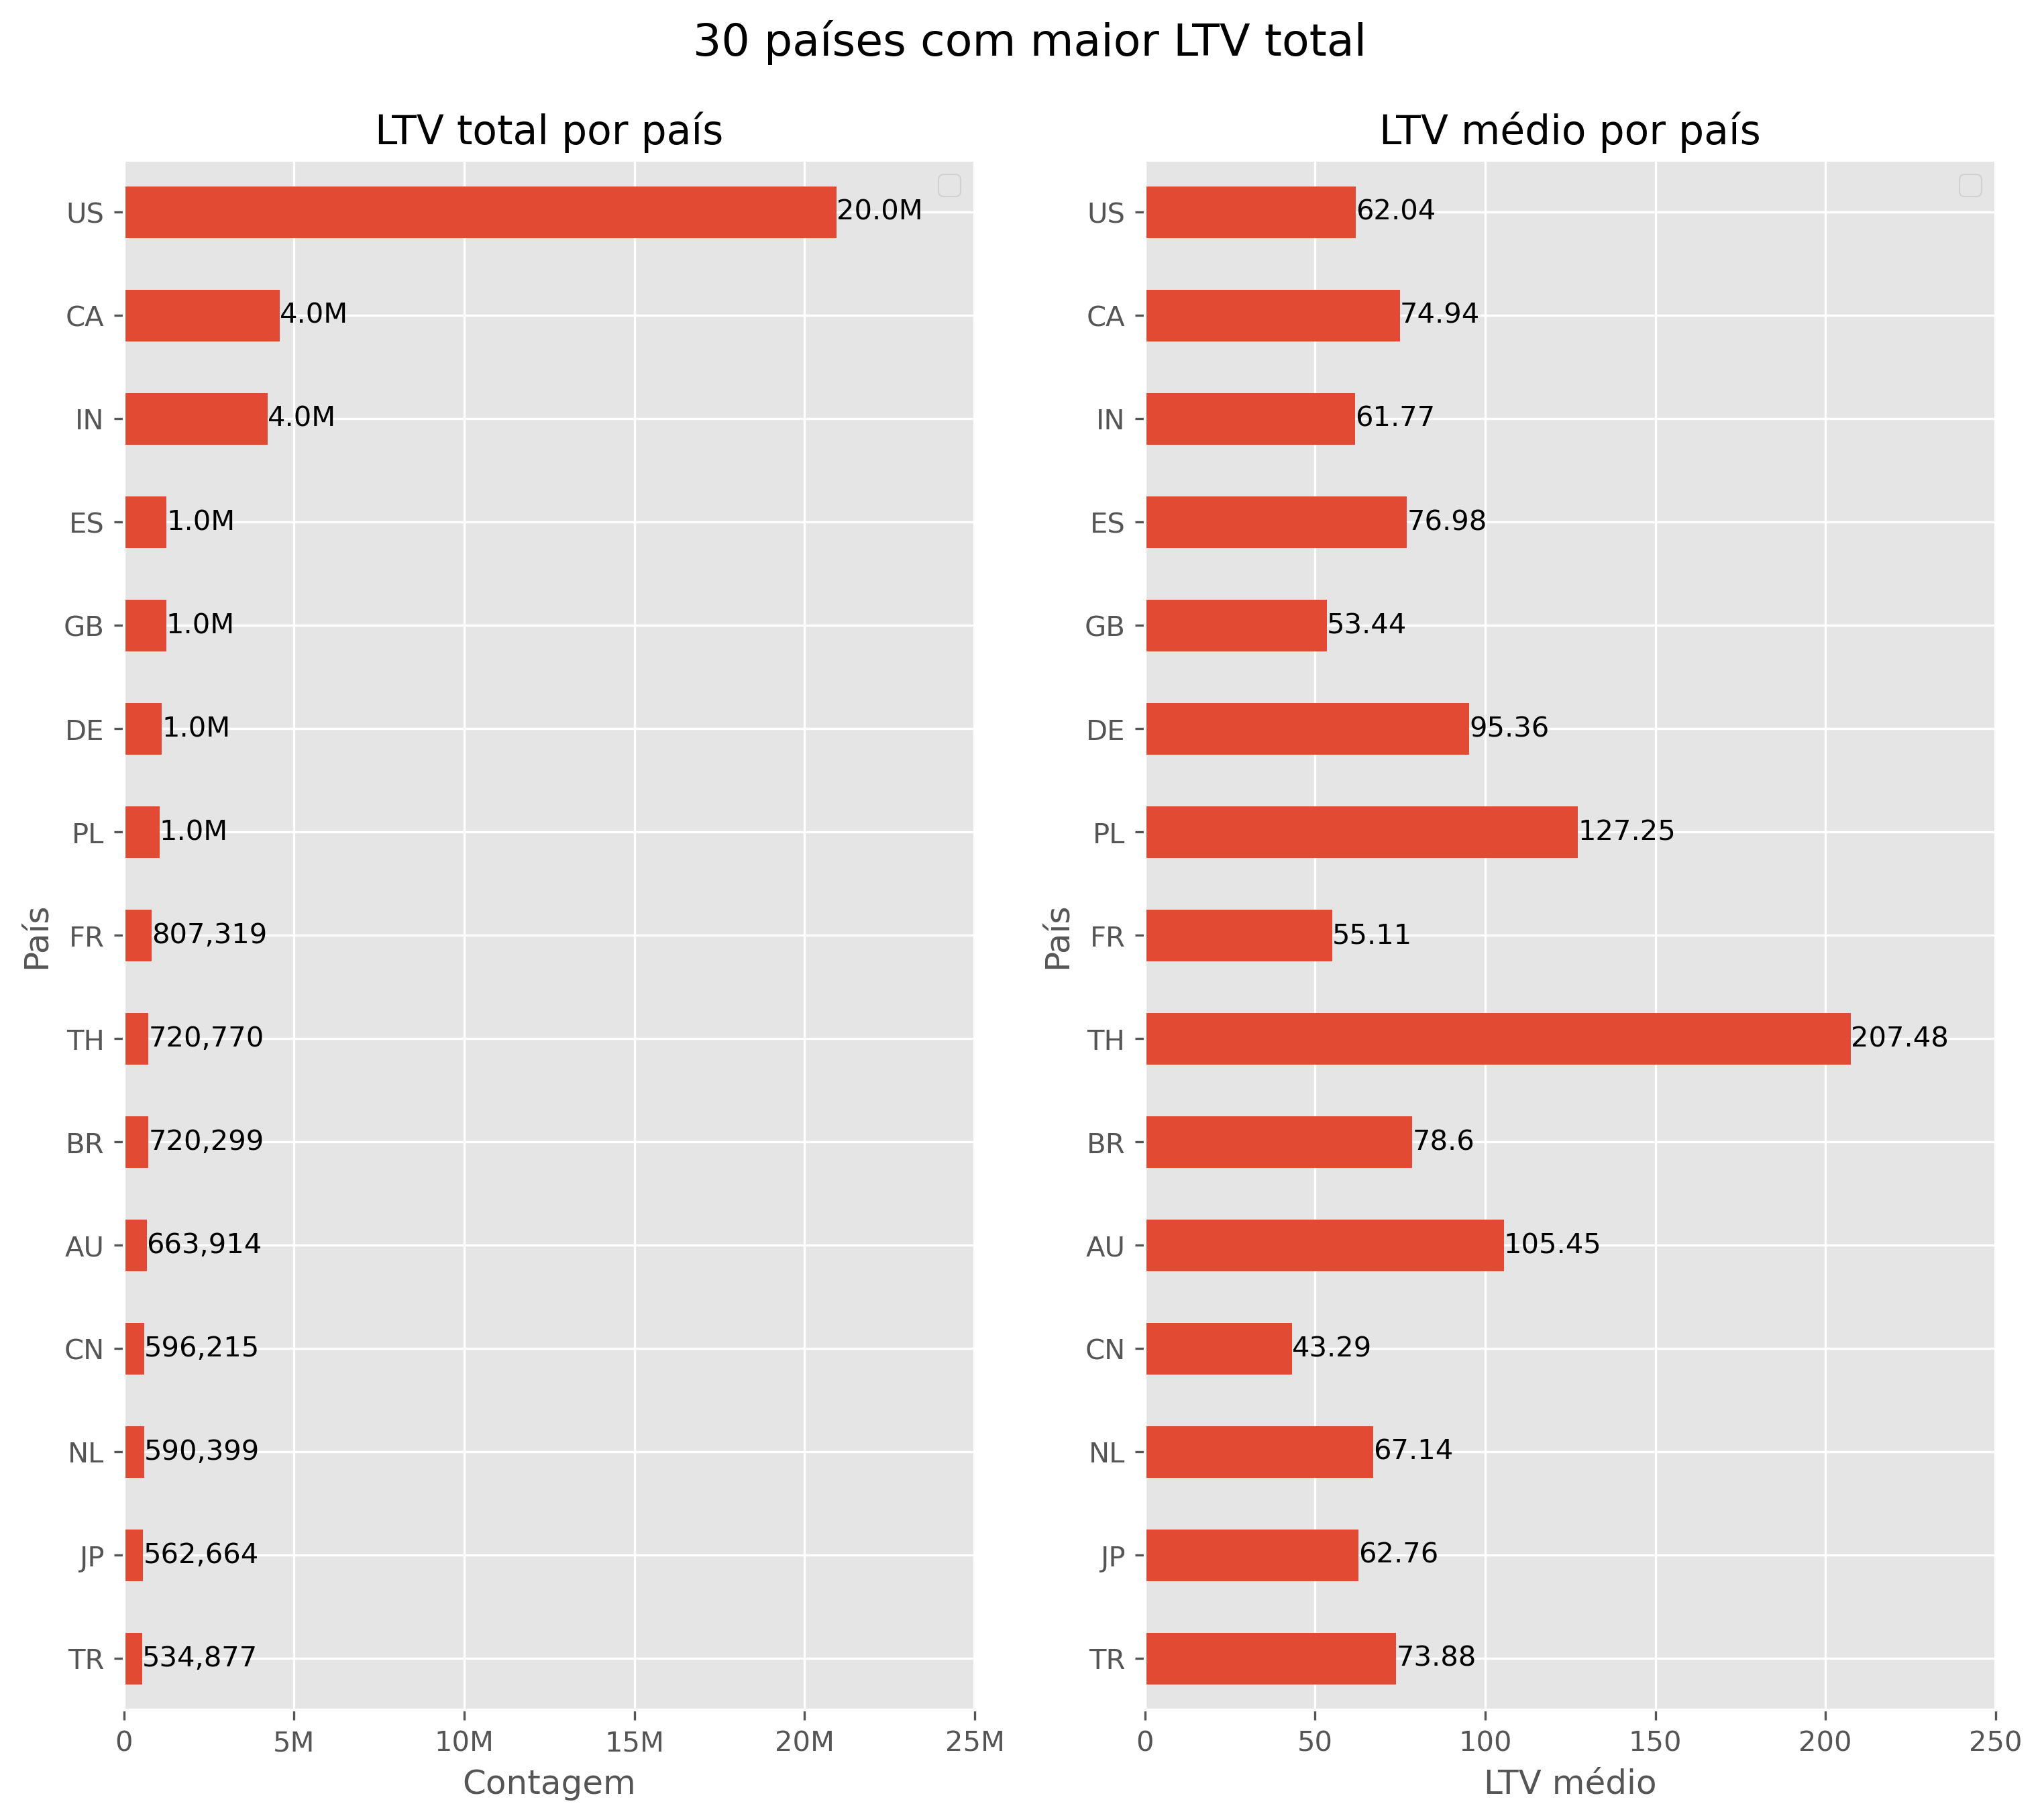

In [345]:
df_country_ltv = pd.DataFrame(columns=['country', 'sum_ltv', 'mean_ltv'])
df_country_ltv['country'] = df[['country', 'ltv']].groupby('country').mean().reset_index()['country']
df_country_ltv['sum_ltv'] = df[['country', 'ltv']].groupby('country').sum().reset_index()['ltv']
df_country_ltv['mean_ltv'] = df[['country', 'ltv']].groupby('country').mean().reset_index()['ltv']
df_country_ltv['mean_ltv'] = df_country_ltv['mean_ltv'].round(2)

df_country_ltv.sort_values('sum_ltv',ascending=False ,inplace=True)
df_country_ltv_top30 = df_country_ltv.head(15)
df_country_ltv_top30 = df_country_ltv_top30.sort_values('sum_ltv')

fig, axs = plt.subplots(figsize=(12,10), ncols=2, nrows=1, dpi=300)

fig.suptitle('30 países com maior LTV total', fontsize=16, y=0.95)
plt.subplots_adjust(top=0.88)

bars0 = df_country_ltv_top30[['country', 'sum_ltv']].plot(kind='barh', x='country', ax=axs[0])
axs[0].set_title('LTV total por país')
axs[0].set_xlabel('Contagem')
axs[0].set_ylabel('País')
axs[0].legend([])
axs[0].set_xticks(np.arange(0,30000000, 5000000), ['0', '5M', '10M', '15M', '20M', '25M'])
for container in bars0.containers:
    axs[0].bar_label(
        container,
        labels=[f'{int(value/1e6):.1f}M' if value >= 1e6 else f'{value:,.0f}' for value in container.datavalues],
        label_type="edge",
    )

bars1 = df_country_ltv_top30[['country', 'mean_ltv']].plot(kind='barh', x='country', ax=axs[1])
axs[1].set_title('LTV médio por país')
axs[1].set_xlabel('LTV médio')
axs[1].set_ylabel('País')
axs[1].legend([])
axs[1].set_xticks(np.arange(0,300, 50), ['0', '50', '100', '150', '200', '250'])
for bar in bars1.containers:
    axs[1].bar_label(bar)

plt.show()

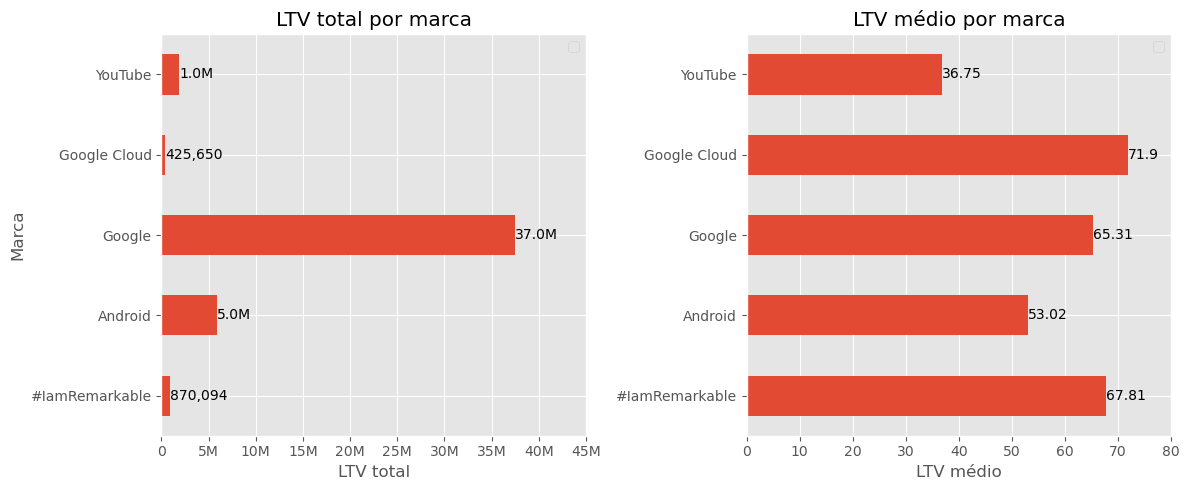

In [346]:
df_brand_ltv = pd.DataFrame(columns=['brand', 'sum_ltv', 'mean_ltv'])
df_brand_ltv['brand'] = df[['brand', 'ltv']].groupby('brand').mean().reset_index()['brand']
df_brand_ltv['sum_ltv'] = df[['brand', 'ltv']].groupby('brand').sum().reset_index()['ltv']
df_brand_ltv['mean_ltv'] = df[['brand', 'ltv']].groupby('brand').mean().reset_index()['ltv']
df_brand_ltv['mean_ltv'] = df_brand_ltv['mean_ltv'].round(2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

bar0 = df_brand_ltv[['brand', 'sum_ltv']].plot(kind='barh', x='brand', ax=axs[0])
axs[0].set_title('LTV total por marca')
axs[0].set_xlabel('LTV total')
axs[0].set_ylabel('Marca')
axs[0].set_xticks(np.arange(0, 50000000, 5000000), ['0', '5M', '10M', '15M', '20M', '25M', '30M', '35M', '40M', '45M'])
for bar in bar0.containers:
    axs[0].bar_label(bar, labels=[f'{int(value/1e6):.1f}M' if value > 1e6 else f'{value:,.0f}' for value in bar.datavalues])
axs[0].legend([])

bar1 = df_brand_ltv[['brand', 'mean_ltv']].plot(kind='barh', x='brand', ax=axs[1])
axs[1].set_title('LTV médio por marca')
axs[1].set_xlabel('LTV médio')
axs[1].set_ylabel('')
axs[1].set_xticks(np.arange(0,90,10))
for bar in bar1.containers:
    axs[1].bar_label(bar)
axs[1].legend([])

plt.tight_layout()

### Análise Temporal das Compras

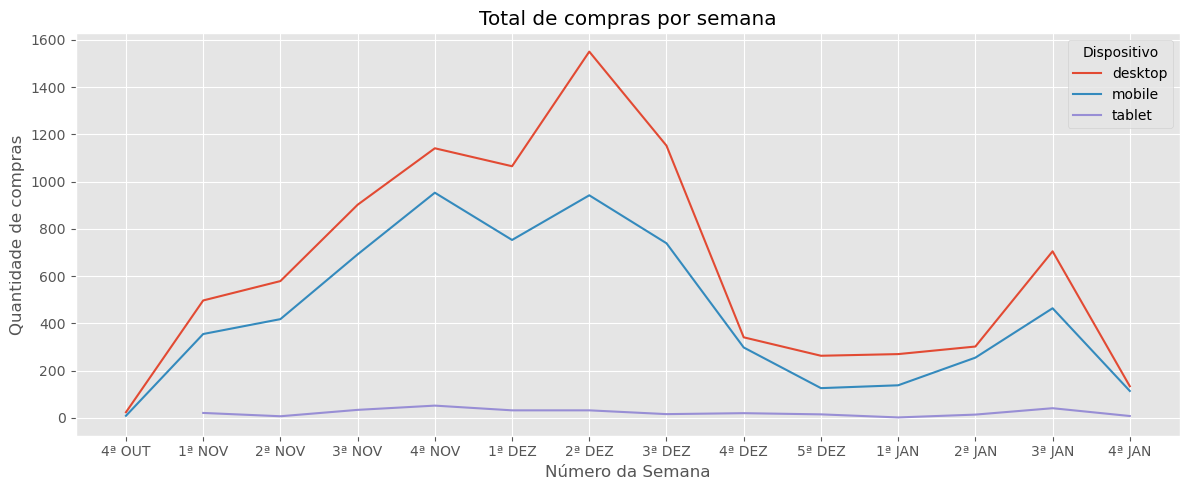

In [347]:
df['date'] = df['date'].astype(str)
df_device = df[df['type'] == 'purchase']
df_device = df_device[['date', 'device', 'category']].groupby(['date', 'device']).count()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.lineplot(data=df_device, x='date', y='category', hue='device', ax=axs)
axs.set_xticks(np.arange(0,14,1), ['4ª OUT', '1ª NOV', '2ª NOV', '3ª NOV', '4ª NOV', '1ª DEZ', '2ª DEZ', '3ª DEZ', '4ª DEZ', '5ª DEZ', '1ª JAN', '2ª JAN', '3ª JAN', '4ª JAN'])
axs.set_title('Total de compras por semana')
axs.set_ylabel('Quantidade de compras')
axs.set_xlabel('Número da Semana')
axs.legend(title='Dispositivo')

plt.tight_layout()

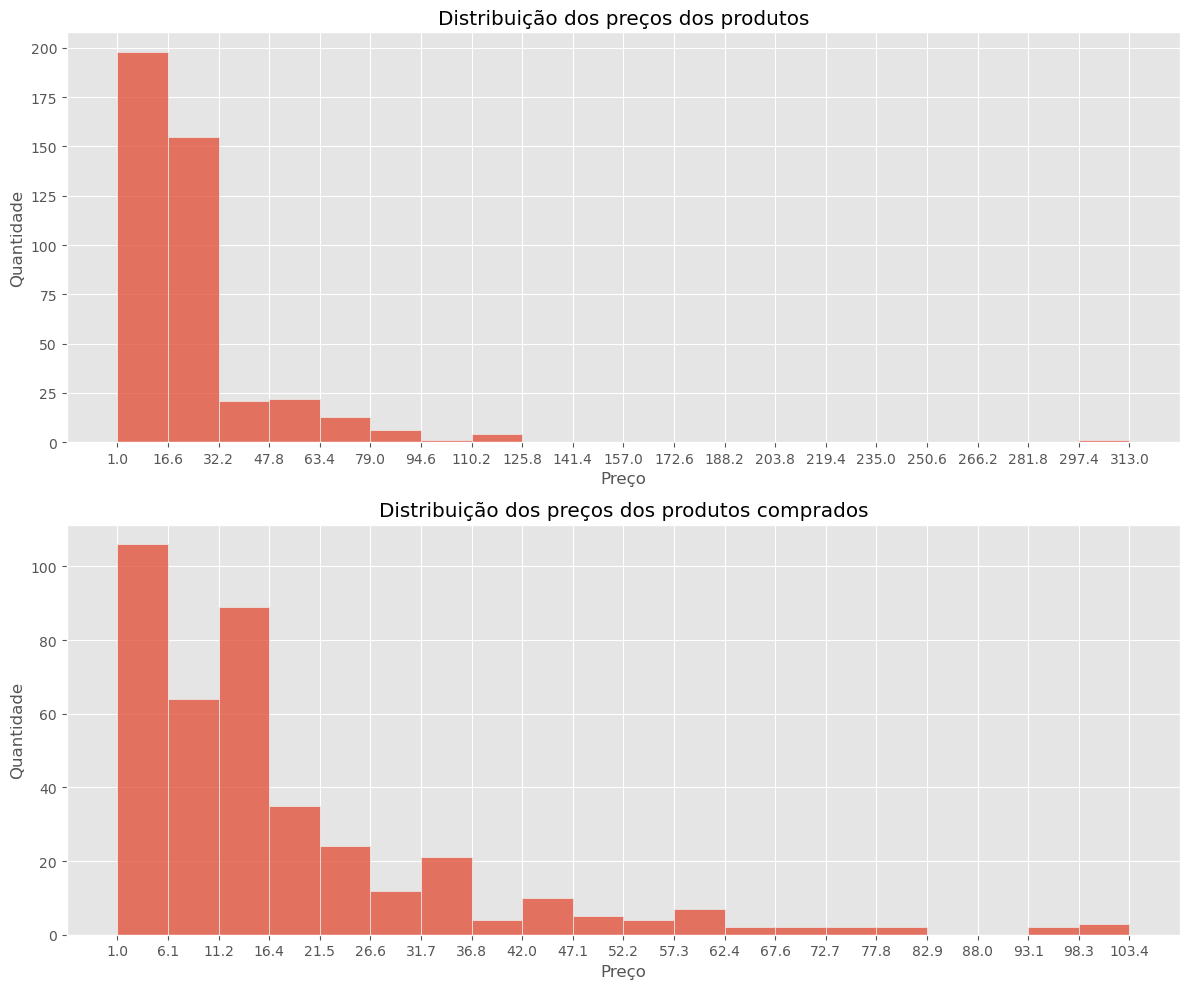

In [348]:
df_price = df[['product_name', 'price']].groupby('product_name').mean().reset_index()
df_price_purchased = df[df['type'] == 'purchase']
df_price_purchased = df_price_purchased[['product_name', 'price']].groupby('product_name').mean().reset_index()
bins = 20

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,10))

sns.histplot(data=df_price, x='price', ax=axs[0], bins=bins)
axs[0].set_title('Distribuição dos preços dos produtos')
axs[0].set_xticks(np.arange(np.min(df_price['price']), 
                         (np.max(df_price['price']) + 1), 
                         (np.max(df_price['price']) - np.min(df_price['price']))/bins ))
axs[0].set_xlabel('Preço')
axs[0].set_ylabel('Quantidade')

sns.histplot(data=df_price_purchased, x='price', ax=axs[1], bins=bins)
axs[1].set_title('Distribuição dos preços dos produtos comprados')
axs[1].set_xticks(np.arange(np.min(df_price_purchased['price']), 
                         (np.max(df_price_purchased['price']) + 1), 
                         (np.max(df_price_purchased['price']) - np.min(df_price_purchased['price']))/bins ))
axs[1].set_xlabel('Preço')
axs[1].set_ylabel('Quantidade')

plt.tight_layout()


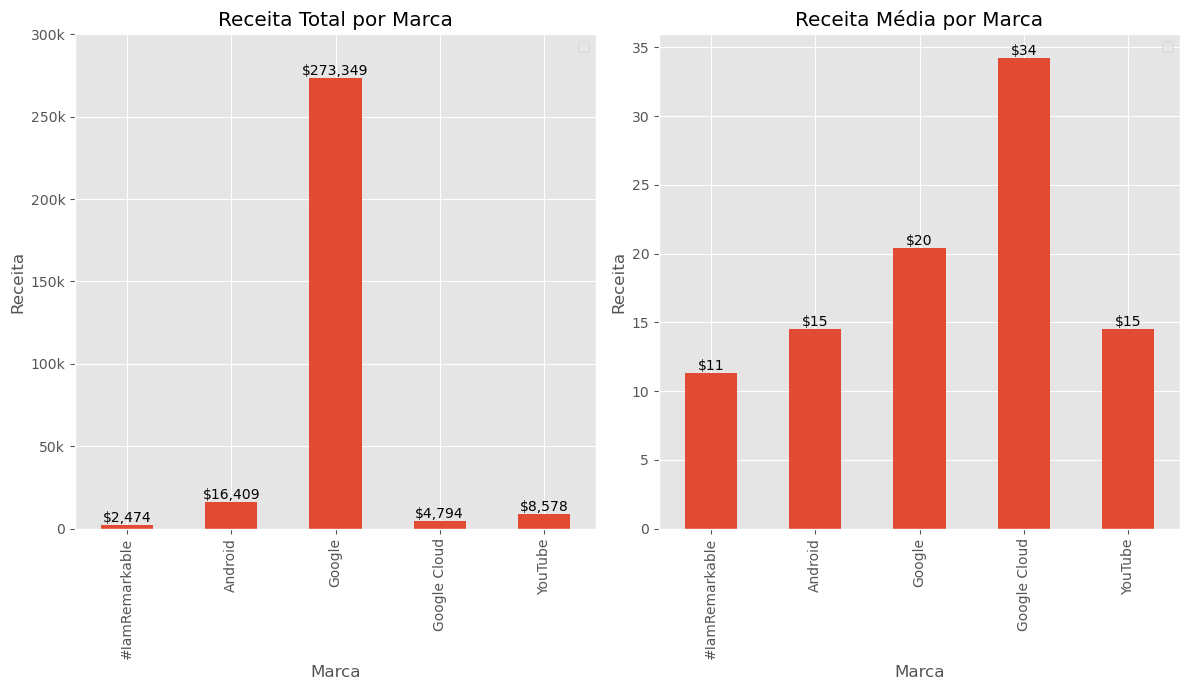

In [349]:
df_purchased = df[df['type'] == 'purchase']

df_revenue_sum = df_purchased[['brand', 'price']].groupby('brand').sum().reset_index()
df_revenue_sum = df_revenue_sum.rename(columns={'price': 'revenue'})

df_revenue_mean = df_purchased[['brand', 'price']].groupby('brand').mean().reset_index()
df_revenue_mean = df_revenue_mean.rename(columns={'price': 'revenue'})

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,7))

bars0 = df_revenue_sum.plot(kind='bar', x='brand', ax=axs[0])
axs[0].set_title('Receita Total por Marca')
axs[0].set_xlabel('Marca')
axs[0].set_ylabel('Receita')
axs[0].set_yticks(np.arange(0, 350000, 50000), ['0', '50k', '100k', '150k', '200k', '250k', '300k'])
axs[0].legend([])
for bar in bars0.containers:
    axs[0].bar_label(
        bar,
        labels=[f'${int(value/1e6):.1f}M' if value > 1e6 else f'${value:,.0f}' for value in bar.datavalues])

bars1 = df_revenue_mean.plot(kind='bar', x='brand', ax=axs[1])
axs[1].set_title('Receita Média por Marca')
axs[1].set_xlabel('Marca')
axs[1].set_ylabel('Receita')
axs[1].legend([])
for bar in bars1.containers:
    axs[1].bar_label(bar, labels=[f'${value:,.0f}' for value in bar.datavalues])

plt.tight_layout()

In [350]:
df_purchased

,user_id,country,device,type,date,ltv,product_name,brand,category,price
0,2133,US,mobile,purchase,2020-10-26/2020-11-01,34,Google Large Tote White,Google,Bags,10
1,2133,US,mobile,purchase,2020-10-26/2020-11-01,34,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,SE,desktop,purchase,2020-10-26/2020-11-01,72,Google KeepCup,Google,New,28
3,5789,SE,desktop,purchase,2020-10-26/2020-11-01,72,Google Mini Kick Ball,Google,Fun,2
52,20120,CA,desktop,purchase,2020-10-26/2020-11-01,25,Android Iconic Backpack,Android,New,25
...,...,...,...,...,...,...,...,...,...,...
755271,8321,US,desktop,purchase,2021-01-25/2021-01-31,16,YouTube Small Sticker Sheet,YouTube,Accessories,2
755272,8321,US,desktop,purchase,2021-01-25/2021-01-31,16,YouTube Twill Sandwich Cap Black,YouTube,Apparel,10
755273,27900,US,mobile,purchase,2021-01-25/2021-01-31,28,Google Campus Bike Corkbase Mug Blue,Google,Lifestyle,14
755274,27900,US,mobile,purchase,2021-01-25/2021-01-31,28,Google LA Campus Mug,Google,Campus Collection,7


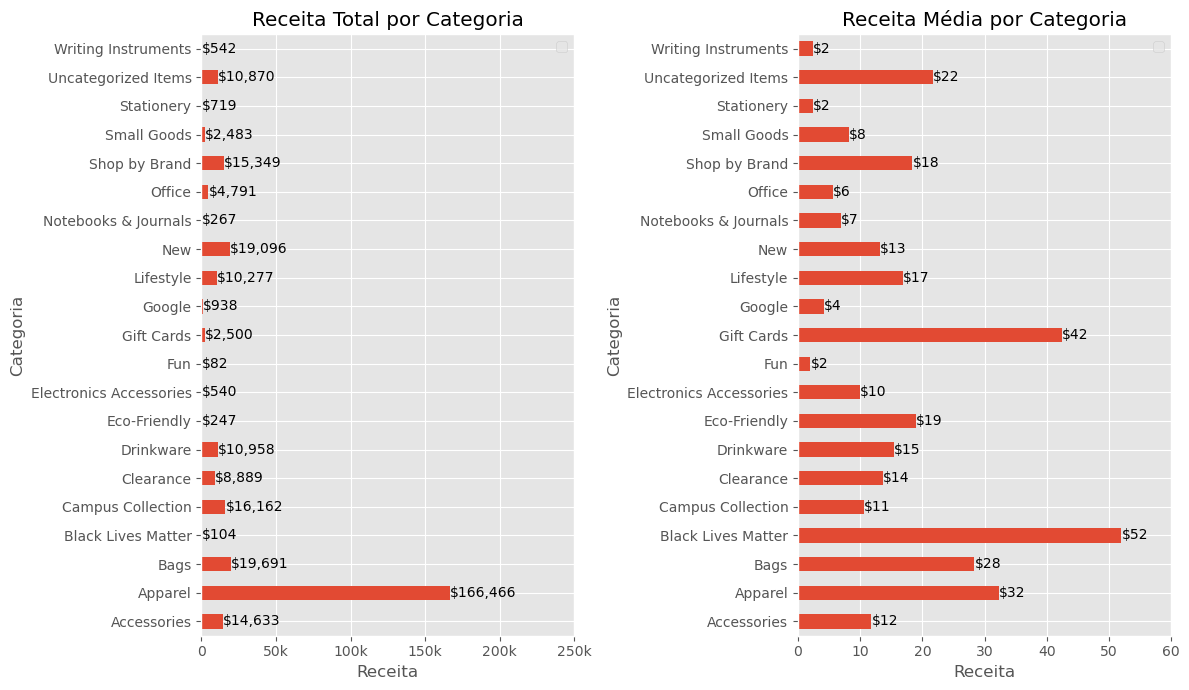

In [351]:
df_revenue_sum = df_purchased[['category', 'price']].groupby('category').sum().reset_index()
df_revenue_sum = df_revenue_sum.rename(columns={'price': 'revenue'})

df_revenue_mean = df_purchased[['category', 'price']].groupby('category').mean().reset_index()
df_revenue_mean = df_revenue_mean.rename(columns={'price': 'revenue'})

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,7))

bars0 = df_revenue_sum.plot(kind='barh', x='category', ax=axs[0])
axs[0].set_title('Receita Total por Categoria')
axs[0].set_xlabel('Receita')
axs[0].set_ylabel('Categoria')
axs[0].set_xticks(np.arange(0, 300000, 50000), ['0', '50k', '100k', '150k', '200k', '250k'])
axs[0].legend([])
for bar in bars0.containers:
    axs[0].bar_label(bar, labels=[f'${value:,.0f}' for value in bar.datavalues])

bars1 = df_revenue_mean.plot(kind='barh', x='category', ax=axs[1])
axs[1].set_title('Receita Média por Categoria')
axs[1].set_xlabel('Receita')
axs[1].set_ylabel('Categoria')
axs[1].set_xticks(np.arange(0,70,10))
axs[1].legend([])
for bar in bars1.containers:
    axs[1].bar_label(bar, labels=[f'${value:,.0f}' for value in bar.datavalues])

plt.tight_layout()

In [352]:
# 1. Contagem de categorias, marcas e produtos únicos por usuário
user_diversity = df[df['type'] == 'purchase'].groupby('user_id').agg(
    unique_categories=('category', 'nunique'),
    unique_brands=('brand', 'nunique'),
    unique_products=('product_name', 'nunique')
).reset_index()

# 2. Calcule a diversidade total somando categorias, marcas e produtos
user_diversity['total_diversity'] = (
    user_diversity['unique_categories'] +
    user_diversity['unique_brands'] +
    user_diversity['unique_products']
)

# 3. Defina faixas de segmentação com base na total_diversity (ex: percentis)
# Obtenha os bins sem erro ajustando o número de rótulos
diversity_bins = pd.qcut(user_diversity['total_diversity'], q=4, duplicates='drop')

# Ajuste dinamicamente o número de rótulos
num_bins = diversity_bins.nunique()
labels = ['Baixa', 'Média', 'Alta', 'Altíssima'][:num_bins]

# Reaplique o qcut com os rótulos ajustados
user_diversity['diversity_level'] = pd.qcut(
    user_diversity['total_diversity'],
    q=4,
    labels=labels,
    duplicates='drop'
)

# Exibir a tabela final com as informações de diversidade por usuário
display(user_diversity.head())

,user_id,unique_categories,unique_brands,unique_products,total_diversity,diversity_level
0,3,1,1,2,4,Baixa
1,4,3,2,5,10,Alta
2,6,1,1,2,4,Baixa
3,7,5,2,5,12,Alta
4,9,2,1,2,5,Baixa


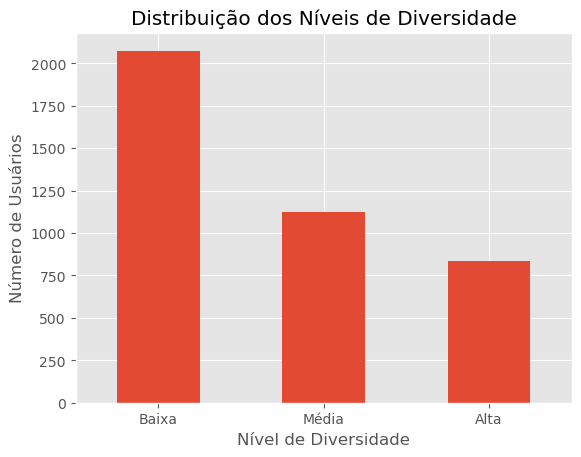

In [353]:
user_diversity['diversity_level'].value_counts().plot(kind='bar', title="Distribuição dos Níveis de Diversidade")
plt.xlabel("Nível de Diversidade")
plt.ylabel("Número de Usuários")
plt.xticks([0,1,2], ['Baixa', 'Média', 'Alta'], rotation=0)
plt.show()